# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11.75

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [191]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [192]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

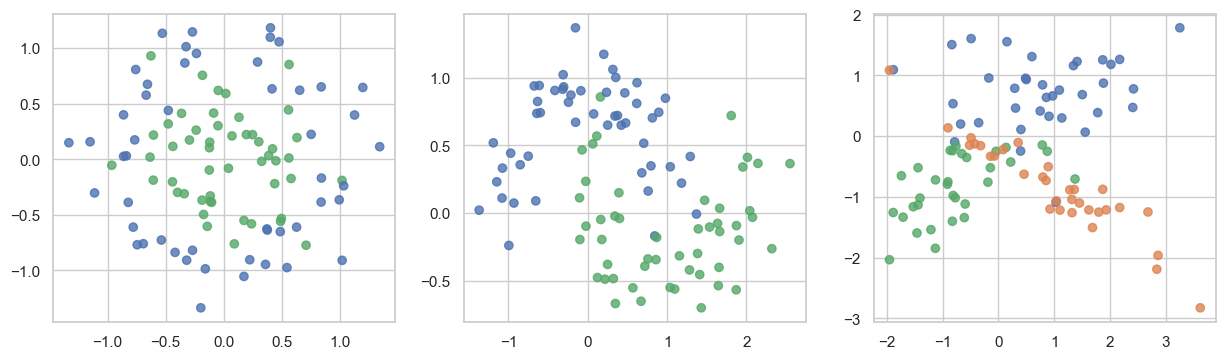

In [193]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [194]:
def plot_surface(clf, X, y, title = "Разделяющая поверхность"):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.title(title)

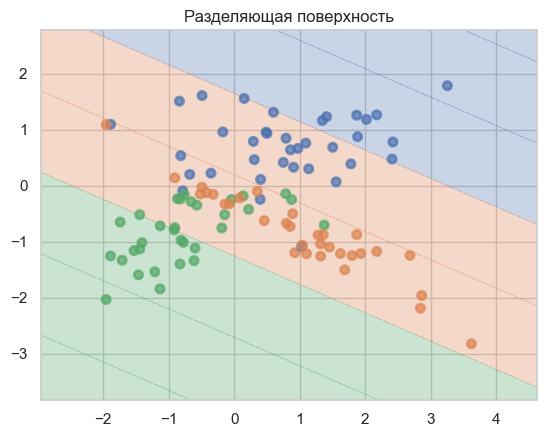

In [195]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет 1
Accuracy на обучающей выборке: 1.0
Accuracy на тестовой выборке: 0.65
Датасет 2
Accuracy на обучающей выборке: 1.0
Accuracy на тестовой выборке: 0.95
Датасет 3
Accuracy на обучающей выборке: 1.0
Accuracy на тестовой выборке: 0.7


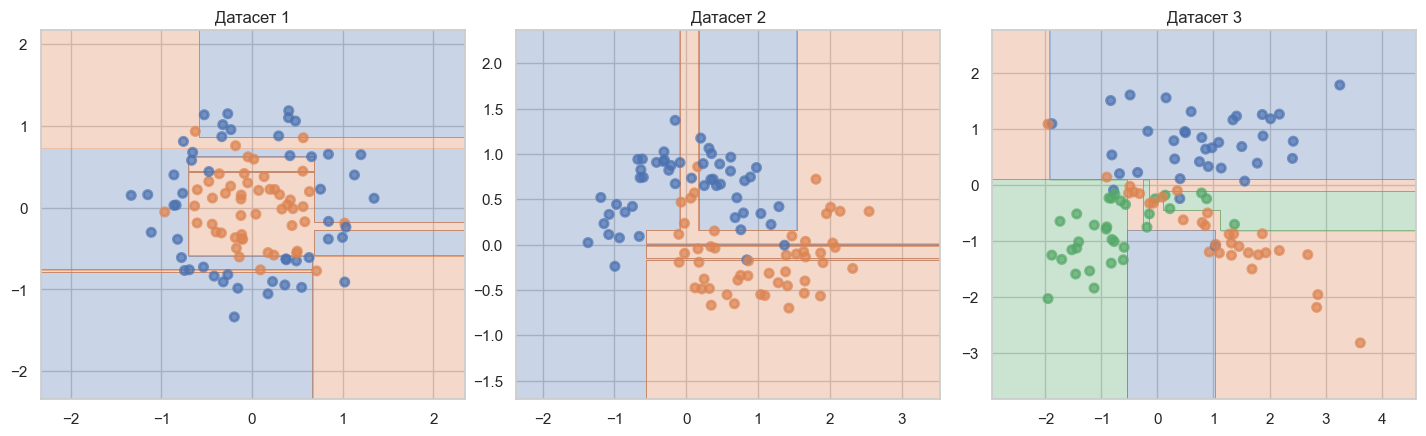

In [196]:
plt.figure(figsize=(15, 5))
for i in range(3):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    print("Датасет", i + 1)
    print("Accuracy на обучающей выборке:", train_accuracy)
    print("Accuracy на тестовой выборке:", test_accuracy)
    
    plt.subplot(1, 3, i+1)
    plot_surface(clf, X, y, f"Датасет {i + 1}")

__Ответ:__ На первом и втором датасете accuracy на тестовой выборке сильно снизилась, что говорит о переобучении. На второй модели разница составило 0.05, что незначительно, а значит модель не переобучилась

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

Датасет 1  max_depth 2  min_samples_leaf 15
Accuracy на обучающей выборке: 0.7875
Accuracy на тестовой выборке: 0.65
Датасет 1  max_depth 2  min_samples_leaf 5
Accuracy на обучающей выборке: 0.8
Accuracy на тестовой выборке: 0.65
Датасет 1  max_depth 2  min_samples_leaf 1
Accuracy на обучающей выборке: 0.8125
Accuracy на тестовой выборке: 0.6
Датасет 1  max_depth None  min_samples_leaf 15
Accuracy на обучающей выборке: 0.7875
Accuracy на тестовой выборке: 0.65
Датасет 1  max_depth None  min_samples_leaf 5
Accuracy на обучающей выборке: 0.9125
Accuracy на тестовой выборке: 0.85
Датасет 1  max_depth None  min_samples_leaf 1
Accuracy на обучающей выборке: 1.0
Accuracy на тестовой выборке: 0.75
Датасет 2  max_depth 2  min_samples_leaf 15
Accuracy на обучающей выборке: 0.825
Accuracy на тестовой выборке: 0.85
Датасет 2  max_depth 2  min_samples_leaf 5
Accuracy на обучающей выборке: 0.8875
Accuracy на тестовой выборке: 0.85
Датасет 2  max_depth 2  min_samples_leaf 1
Accuracy на обучающей выб

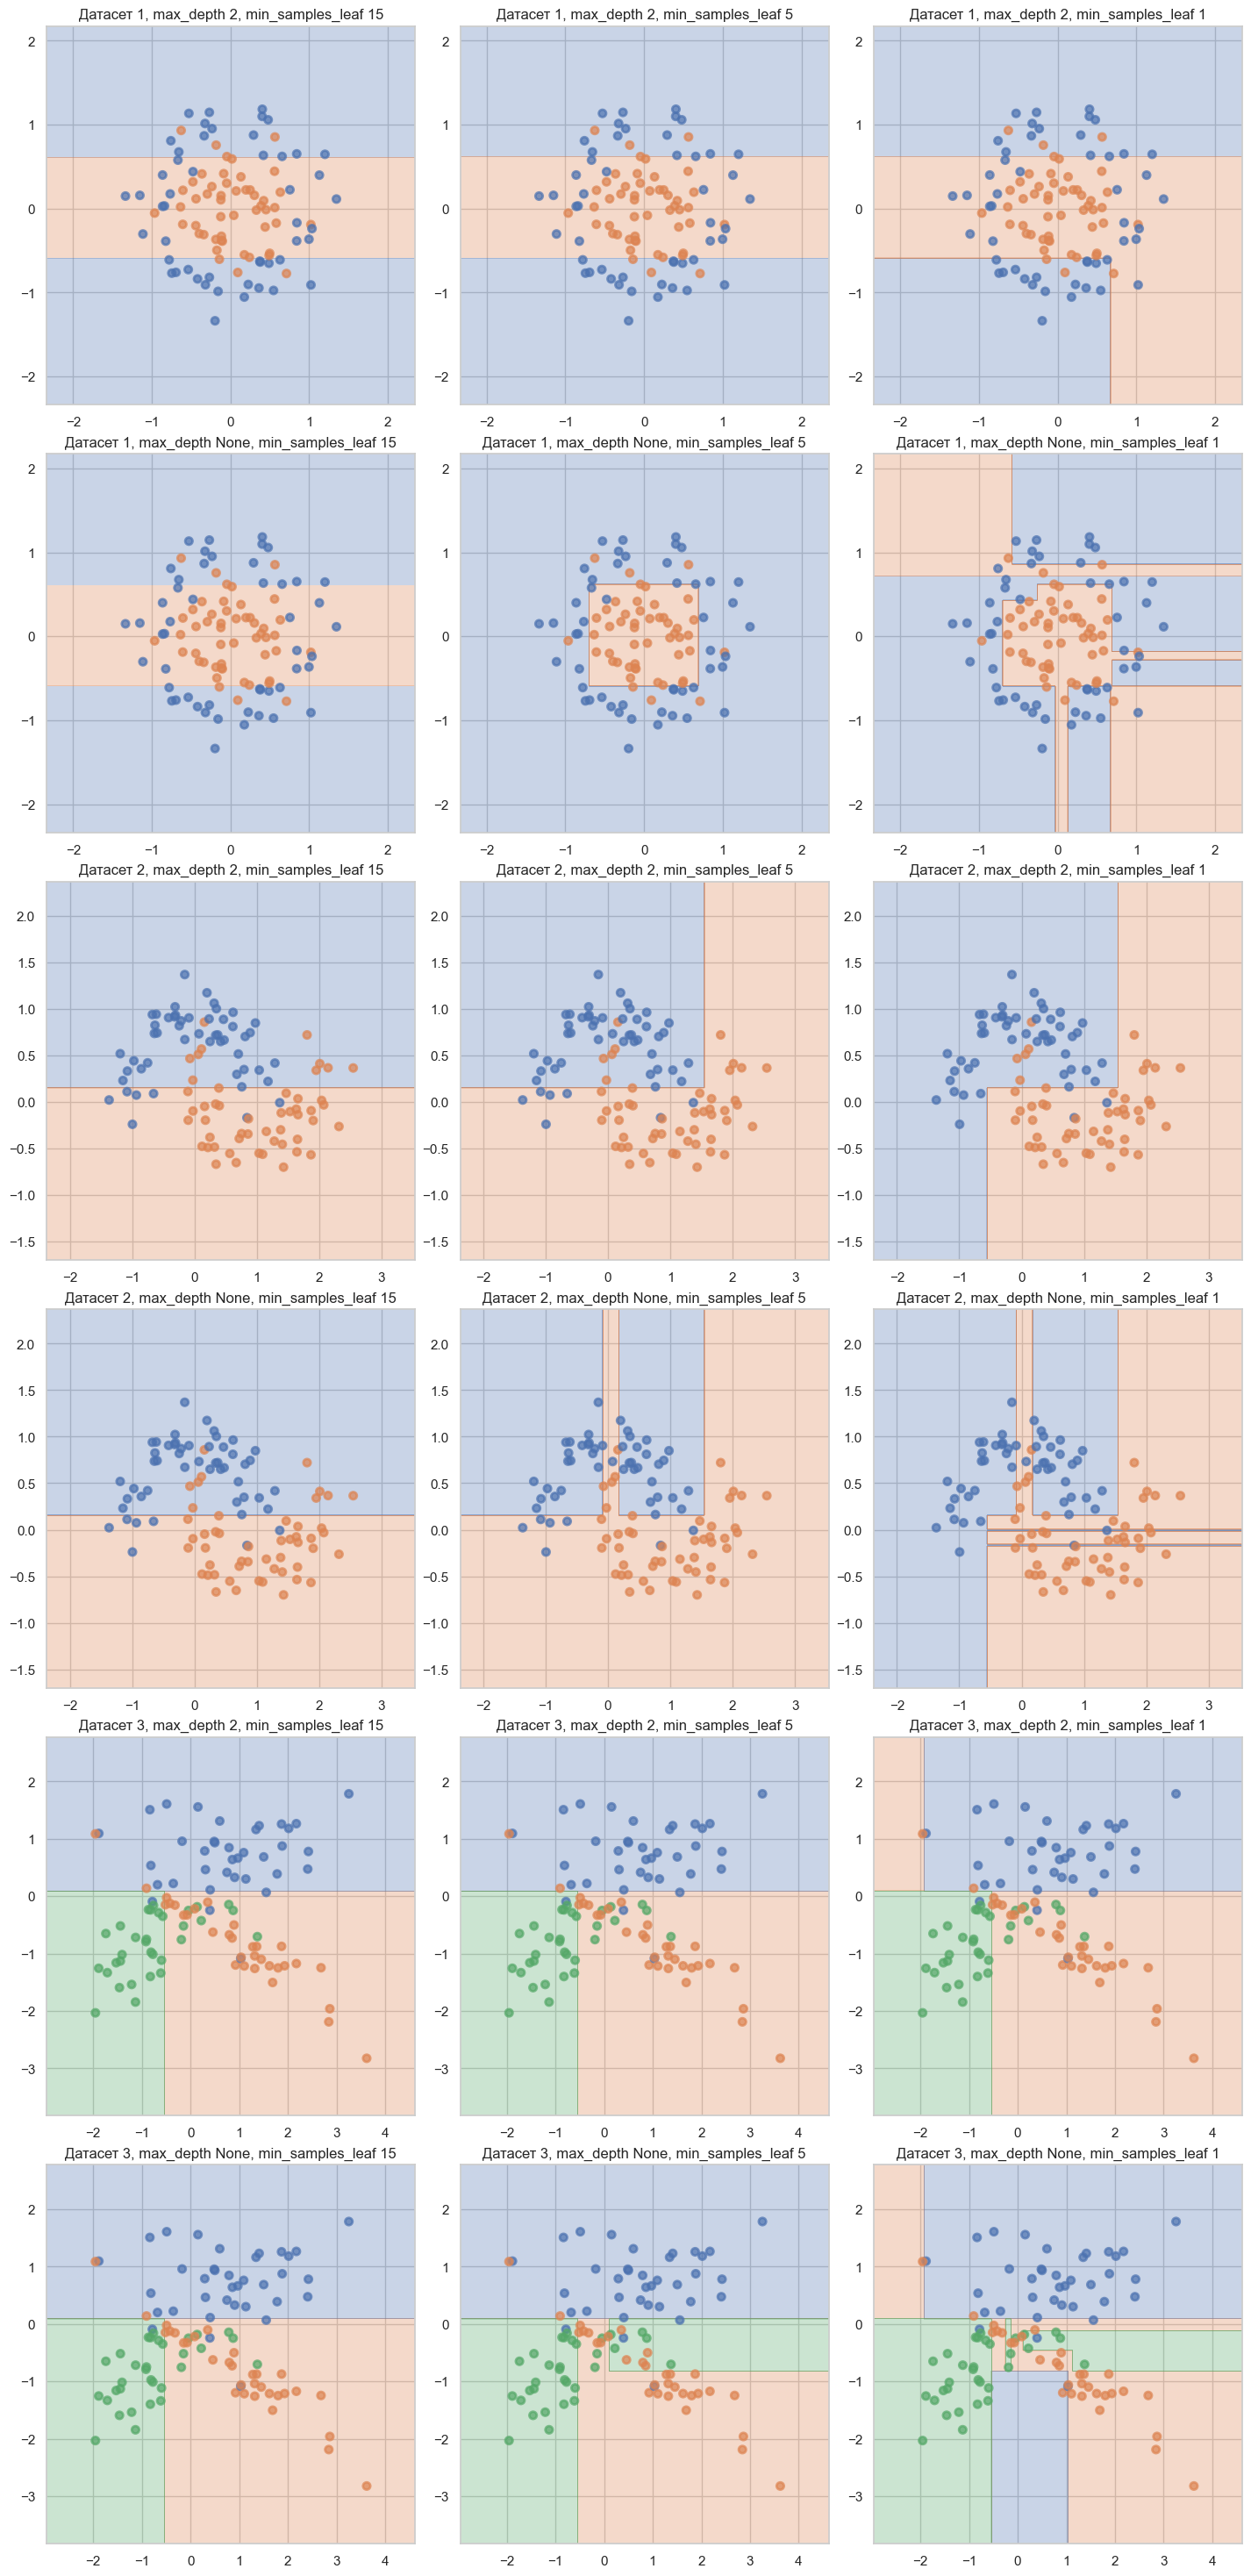

In [197]:
n = 1
plt.figure(figsize=(15, 30))
for o in range(3):
    X, y = datasets[o]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for i, max_depth in enumerate([2, None]):
        for j, min_samples_leaf in enumerate([15, 5, 1]):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            train_accuracy = clf.score(X_train, y_train)
            test_accuracy = clf.score(X_test, y_test)
            
            print("Датасет", o + 1, " max_depth", max_depth, " min_samples_leaf", min_samples_leaf)
            print("Accuracy на обучающей выборке:", train_accuracy)
            print("Accuracy на тестовой выборке:", test_accuracy)
            
            plt.subplot(6, 3, n)
            plot_surface(clf, X, y, f"Датасет {o+1}, max_depth {max_depth}, min_samples_leaf {min_samples_leaf}")
            n += 1

__Ответ:__   Во всех трех датасетах при увеличении глубины дерева и снижении минимального числа выборок в листе точность на обучающей выборке растет, разделяющая поверхность становится сложной и изломанной, но точность на тестовой выборке снижается, что говорит о переобучении модели, тк модель начинает подгонять под шумы обучающей выборки, чего не способна делать на тестовой. При сильной регуляризации точность на 1 и 3 выборках снижается из-за недообучения, для них нужно искать оптимальные значения. 2 датасет лучше подстраивается и менее склонен к переобучению

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Посылка(ник в контесте ankatevs) https://contest.yandex.ru/contest/72492/run-report/129605022/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

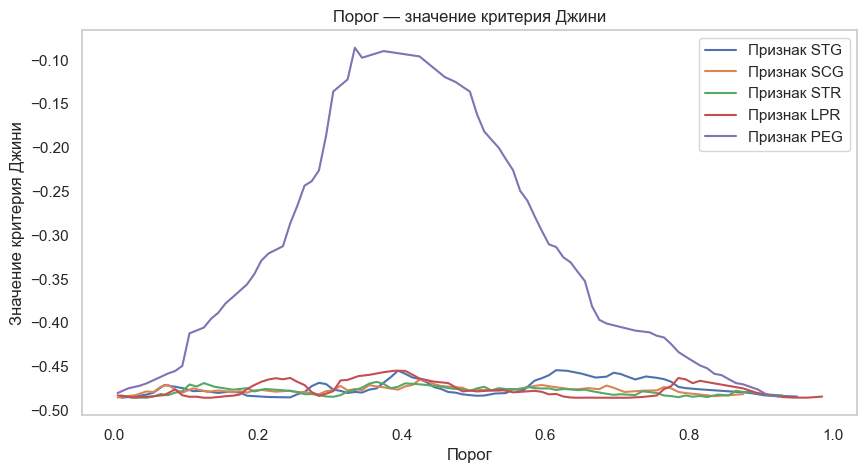

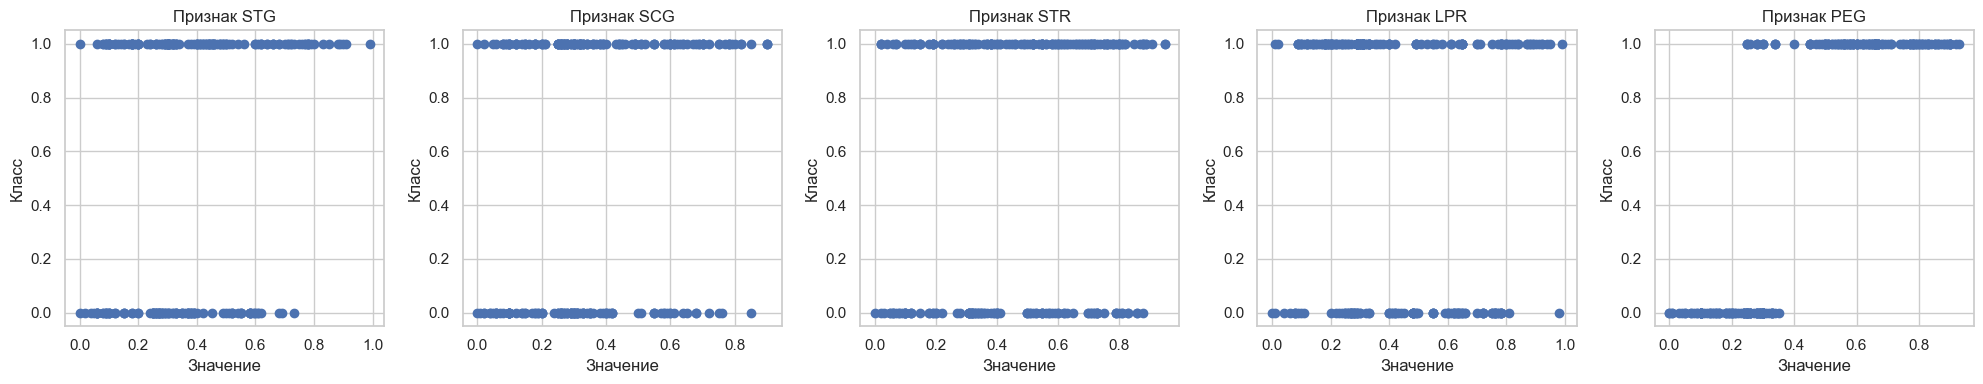

In [198]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import importlib
import hw5code
from hw5code import find_best_split
importlib.reload(hw5code)

data = pd.read_csv("students.csv")

features = data.iloc[:, :5]  
target = data.iloc[:, -1]   

results = {}
for column in features.columns:
    thresholds, ginis, threshold_best, gini_best = find_best_split(features[column].values, target.values)
    results[column] = (thresholds, ginis)

plt.figure(figsize=(10, 5)) # график Порог — значение критерия Джини
for column, (thresholds, ginis) in results.items():
    plt.plot(thresholds, ginis, label=f"Признак {column}")
plt.title("Порог — значение критерия Джини")
plt.xlabel("Порог")
plt.ylabel("Значение критерия Джини")
plt.legend()
plt.grid()
plt.show()


fig, axes = plt.subplots(1, 5, figsize=(20, 4)) # графики значение признака - класс
for i, column in enumerate(features.columns):
    axes[i].scatter(features[column], target)
    axes[i].set_title(f"Признак {column}")
    axes[i].set_xlabel("Значение")
    axes[i].set_ylabel("Класс")
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** На первом графике видно, что лучше производить деление выборки на два поддерева по признаку PEG, т.к. он выше всех остальных. Scatter-графики тоже это поддтверждают, т.к. для PEG видно, что классы 0 и 1 имеют чёткое разделение. Кривая для хороших признаков имеет максимум и имеет вид горки. Плохие признаки выглядят на графике прямыми с небольшими колебаниями и не имеют максимум.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

 Посылка в контесте https://contest.yandex.ru/contest/72492/run-report/129605501/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [199]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree


columns = [
    "poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

data = pd.read_csv("agaricus-lepiota.data", header=None, names=columns)

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
feature_types = ["categorical"] * X.shape[1]
tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

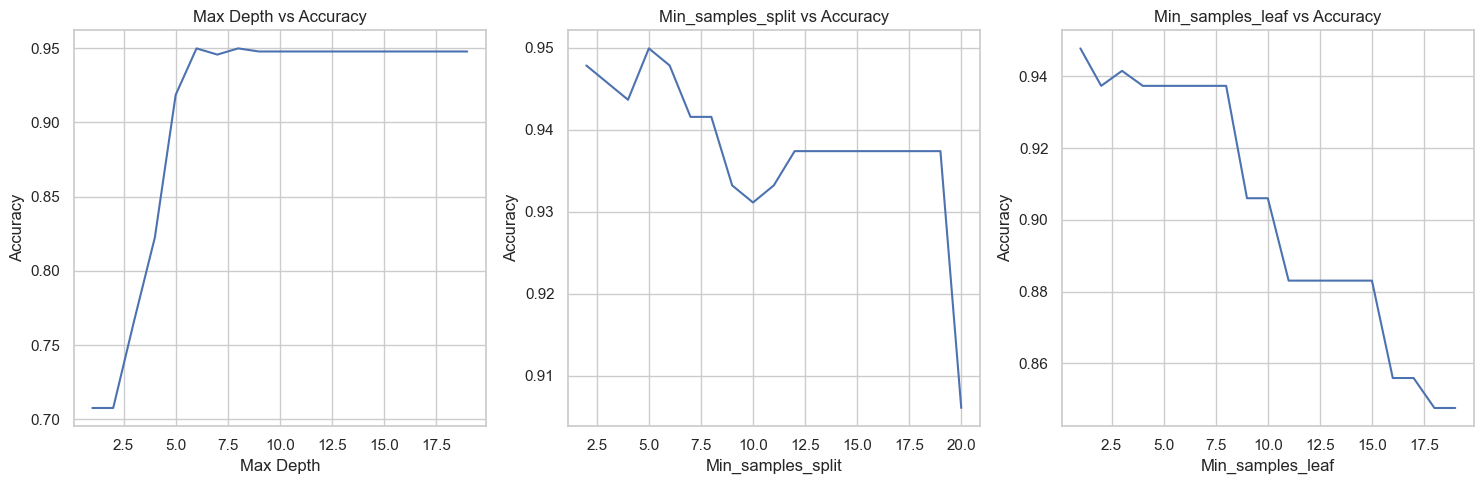

In [200]:
df = pd.read_csv("tic-tac-toe-endgame.csv")

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

max_depth_values = range(1, 20)
min_samples_split_values = range(2, 21)
min_samples_leaf_values = range(1, 20)
accuracies = [[], [], []]

feature_types=["categorical"] * X_train.shape[1]
params = [[max_depth_values, [None]*19 , [None]*19],
           [[None]*19, min_samples_split_values, [None]*19],
             [[None]*19, [None]*19, min_samples_leaf_values]]
labels = ["Max Depth", "Min_samples_split", "Min_samples_leaf"]
plt.figure(figsize=(15, 5))
for j in range(3):
    for i in range(19):
        tree = DecisionTree(feature_types = feature_types, max_depth = params[j][0][i], min_samples_split = params[j][1][i], min_samples_leaf = params[j][2][i])
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        accuracies[j].append(accuracy_score(y_test, y_pred))
    plt.subplot(1, 3, j+1)
    plt.plot(params[j][j], accuracies[j])
    plt.title(f"{labels[j]} vs Accuracy")
    plt.xlabel(labels[j])
    plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [225]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import hw5code
from hw5code import LinearRegressionTree
importlib.reload(hw5code)


data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() # нормализуем
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

max_depth_values = [3, 5, 10]
min_samples_split_values = [5, 10, 20]
min_samples_leaf_values = [1, 5, 10]

best_mse_linear = np.inf
best_mse = np.inf

for depth in max_depth_values:
    for split in min_samples_split_values:
        for leaf in min_samples_leaf_values:
            linear_tree = LinearRegressionTree(feature_types=["real"] * X_train.shape[1], max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
            linear_tree.fit(X_train, y_train)
            y_pred_linear = linear_tree.predict(X_test)

            mse_linear = mean_squared_error(y_test, y_pred_linear)
            if mse_linear < best_mse_linear:
                best_mse_linear = mse_linear
                best_params_linear = {
                    'max_depth': depth,
                    'min_samples_split': split,
                    'min_samples_leaf': leaf
                }

            tree = DecisionTreeRegressor(max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_params = {
                    'max_depth': depth,
                    'min_samples_split': split,
                    'min_samples_leaf': leaf
                }

print("LinearRegressionTree")
print("max_depth:", best_params_linear["max_depth"],
        "min_samples_split:", best_params_linear["min_samples_split"],
        "min_samples_leaf:", best_params_linear["min_samples_leaf"])
print("Best MSE for LinearRegressionTree", best_mse_linear)
print("DecisionTreeRegressor")
print("max_depth:", best_params["max_depth"],
        "min_samples_split:", best_params["min_samples_split"],
        "min_samples_leaf:", best_params["min_samples_leaf"])
print("Best MSE for DecisionTreeRegressor", best_mse)

LinearRegressionTree
max_depth: 5 min_samples_split: 5 min_samples_leaf: 1
Best MSE for LinearRegressionTree 0.3662068682305454
DecisionTreeRegressor
max_depth: 10 min_samples_split: 10 min_samples_leaf: 10
Best MSE for DecisionTreeRegressor 0.37754838316356193


Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

MSE for LinearRegressionTree: 0.01840680658413838
MSE for DecisionTreeRegressor: 0.0197125550852925


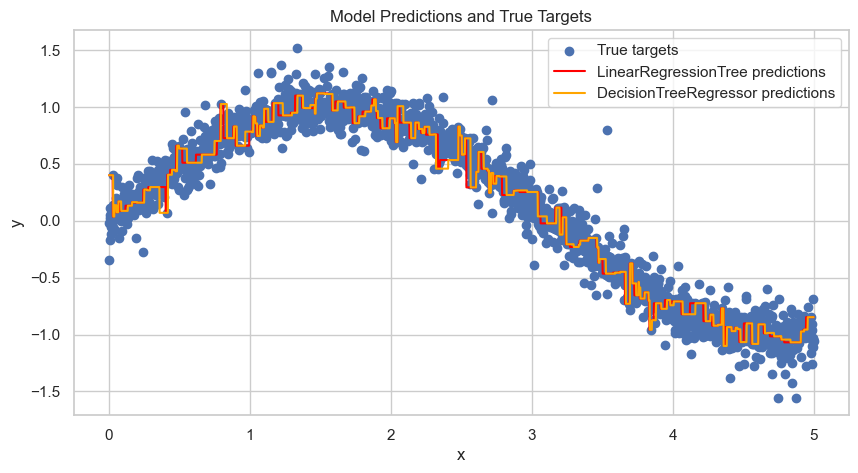

In [222]:
import hw5code
from hw5code import LinearRegressionTree
importlib.reload(hw5code)
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

linear_tree = LinearRegressionTree(feature_types=["real"] * x.shape[1])
linear_tree.fit(x_train, y_train)
y_pred_linear = linear_tree.predict(x)

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x)

mse_linear = mean_squared_error(y, y_pred_linear)
mse_tree = mean_squared_error(y, y_pred_tree)

print("MSE for LinearRegressionTree:", mse_linear)
print("MSE for DecisionTreeRegressor:", mse_tree)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="True targets")
plt.plot(x, y_pred_linear, label="LinearRegressionTree predictions", color="red")
plt.plot(x, y_pred_tree, label="DecisionTreeRegressor predictions", color="orange")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions and True Targets")
plt.show()

**Ответ:** LinearDecisionTree работает чуть лучше, чем DecisionTreeRegressor, при этом глубина дерева меньше, тк LinearDecisionTree сочетает в себе преимущества линейных моделей и древьев решений позволяет оброботать сложные зависимости. Возможность задавать глубину, количество выборок для разбиения и количество выборок в листах помогает избежать переобучения. Однако такая модель рабротает в разы дольше и требует больше вычислительных ресурсов. Так же при наличии шума в данных, модель может сильно переобучаться 

Вставьте что угодно, описывающее ваши впечатления от этого задания:

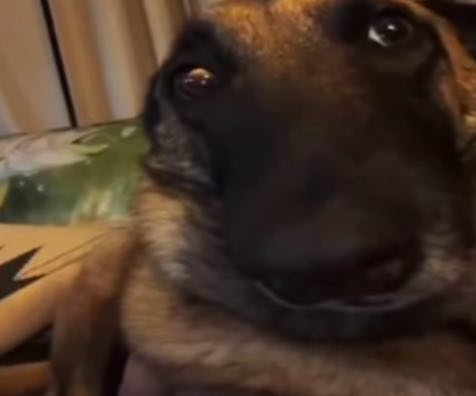